# Investigating Regional and Temporal Responses of Vegetation Optical Depth to Precipitation Anomalies in Northern Australia and the Sahel

## Question / Hypotheses
Research Question: How seasonal precipitation anomalies influence vegetation optical depth (VOD) across two climatically contrasting regions: the tropical savannas of northern Australia and the Sahel region of northern Africa?

Hypothesis 1: The strength and pattern of the VOD response to precipitation anomalies differ between these two regions due to differences in ecosystem structure and rainfall seasonality.

Hypothesis 2: VOD exhibits a lagged response to precipitation anomalies, and the optimal lag period varies between regions.

## Group Member:

Suixuan Chang

Yining Chen

## Datasets Used

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns


In [2]:
vod = xr.open_dataset(
    'gs://leap-persistent/data-library/GLAB-VOD/GLAB-VOD.zarr',
    engine='zarr',
    chunks={}
)

In [3]:
precip = xr.open_dataset(
    'https://nyu1.osn.mghpcc.org/leap-pangeo-pipeline/chirps_feedstock/chirps-global-daily.zarr',
    engine='zarr',
    chunks={}
)

In [4]:
print(vod)
print(precip)

<xarray.Dataset> Size: 4GB
Dimensions:           (time: 377, lat: 505, lon: 1246)
Coordinates:
  * lat               (lat) float64 4kB -51.9 -51.59 -51.28 ... 75.14 75.92
  * lon               (lon) float64 10kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * time              (time) datetime64[ns] 3kB 2002-06-19 ... 2020-12-23
Data variables:
    VOD               (time, lat, lon) float32 949MB dask.array<chunksize=(200, 260, 450), meta=np.ndarray>
    VOD_residual      (time, lat, lon) float32 949MB dask.array<chunksize=(200, 260, 450), meta=np.ndarray>
    VOD_residual_std  (time, lat, lon) float32 949MB dask.array<chunksize=(200, 260, 450), meta=np.ndarray>
    VOD_std           (time, lat, lon) float32 949MB dask.array<chunksize=(200, 260, 450), meta=np.ndarray>
Attributes:
    authors:            Olya Skulovich, Xiaojun Li, Jean-Pierre Wigneron, Pie...
    creation_date:      December 2023
    email:              os2328@columbia.edu
    publication:        GLAB-VOD: Global L-band AI-Bas

In [5]:
# Region and Time Cropping
vod_au = vod['VOD'].sel(lat=slice(-20, -10), lon=slice(120, 140), time=slice("2002-01-01", "2020-12-31"))
vod_sahel = vod['VOD'].sel(lat=slice(10, 20), lon=slice(-15, 30), time=slice("2002-01-01", "2020-12-31"))
precip_au = precip['precip'].sel(latitude=slice(-20, -10), longitude=slice(120, 140), time=slice("2002-01-01", "2020-12-31"))
precip_sahel = precip['precip'].sel(latitude=slice(10, 20), longitude=slice(-15, 30), time=slice("2002-01-01", "2020-12-31"))

In [6]:
# Aggregate precipitation data from daily to monthly (unit: mm/month)
precip_au_monthly = precip_au.resample(time='ME').sum()
precip_sahel_monthly = precip_sahel.resample(time='ME').sum()
vod_au_monthly = vod_au.resample(time='ME').mean()
vod_sahel_monthly = vod_sahel.resample(time='ME').mean()

## Precipitation Time Series

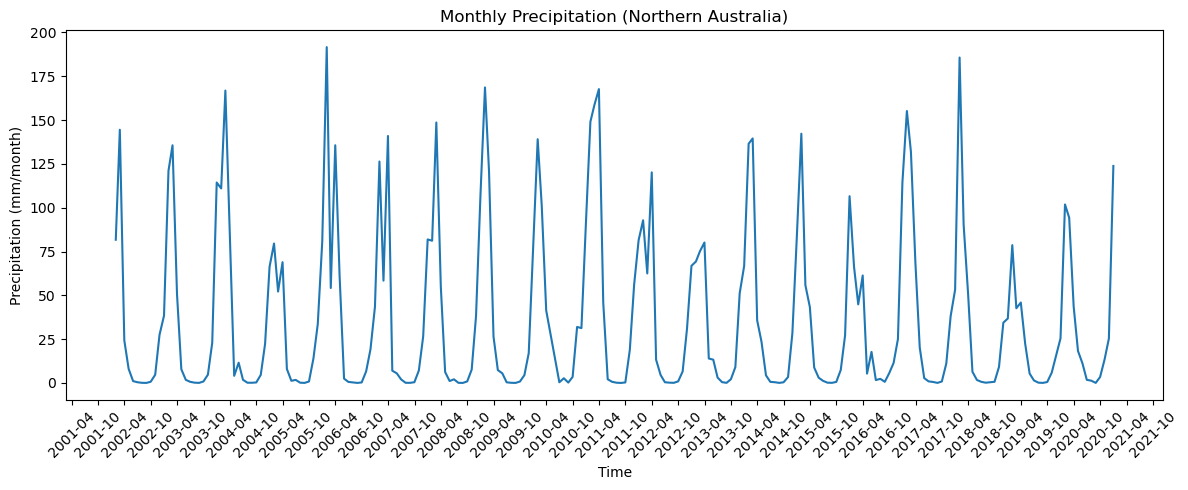

In [7]:
# Northern Australia
plt.figure(figsize=(12, 5))
precip_au_monthly.mean(dim=['latitude', 'longitude']).plot()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # year-month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # A scale is displayed every six months, implying the wet season (11-4), dry season (5-10)
plt.xticks(rotation=45)
        
plt.title("Monthly Precipitation (Northern Australia)")
plt.ylabel("Precipitation (mm/month)")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

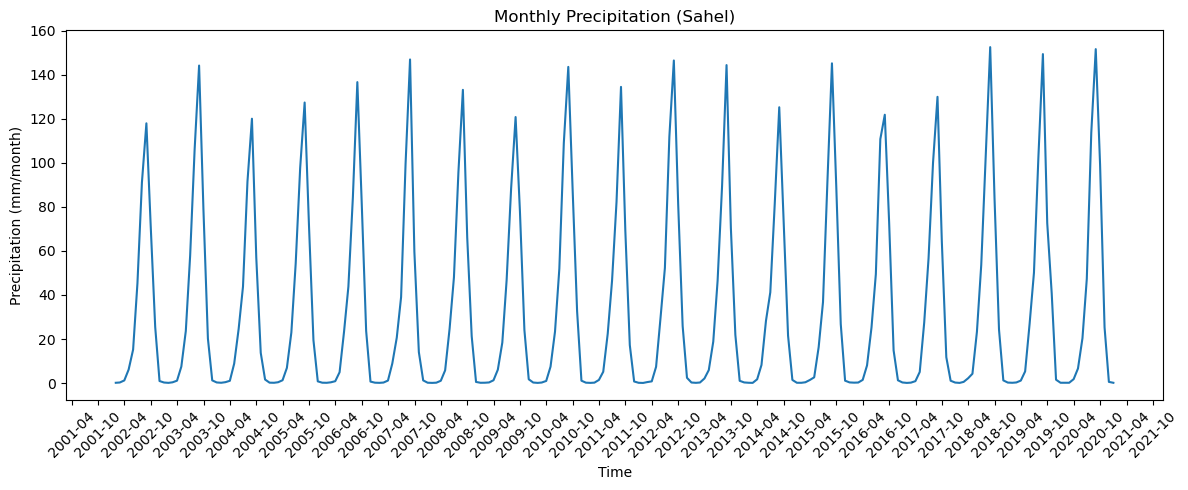

In [8]:
# Sahel
plt.figure(figsize=(12, 5))
precip_sahel_monthly.mean(dim=['latitude', 'longitude']).plot()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # year-month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # A scale is displayed every six months implying the wet season (6-9), dry season (10-5)
plt.xticks(rotation=45)

plt.title("Monthly Precipitation (Sahel)")
plt.ylabel("Precipitation (mm/month)")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

## VOD Time Series

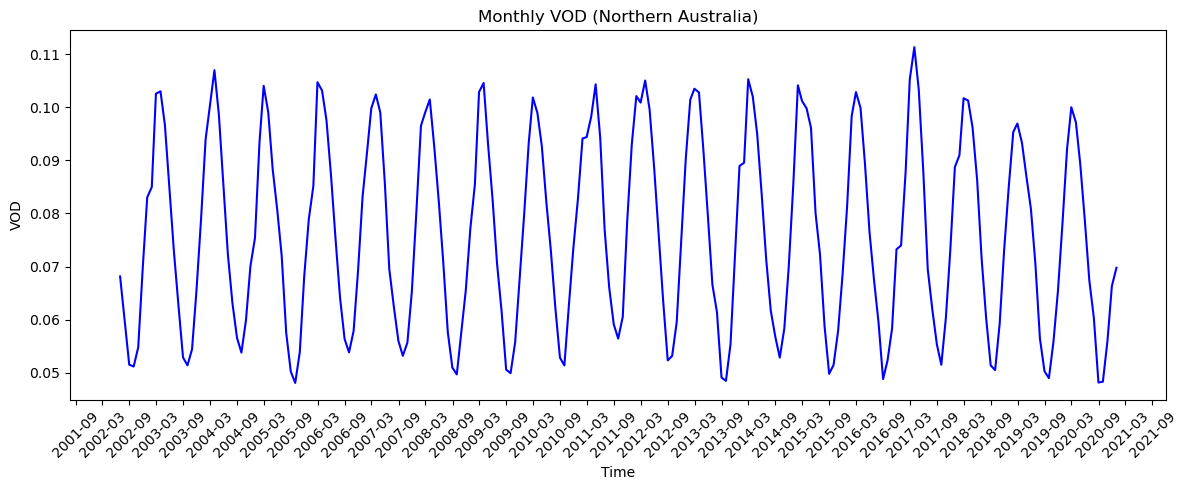

In [9]:
# Northern Australia
plt.figure(figsize=(12, 5))
vod_au_monthly.mean(dim=['lat', 'lon']).plot(label='VOD', color='blue')
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # year-month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  
plt.xticks(rotation=45)
plt.title("Monthly VOD (Northern Australia)")
plt.ylabel("VOD")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

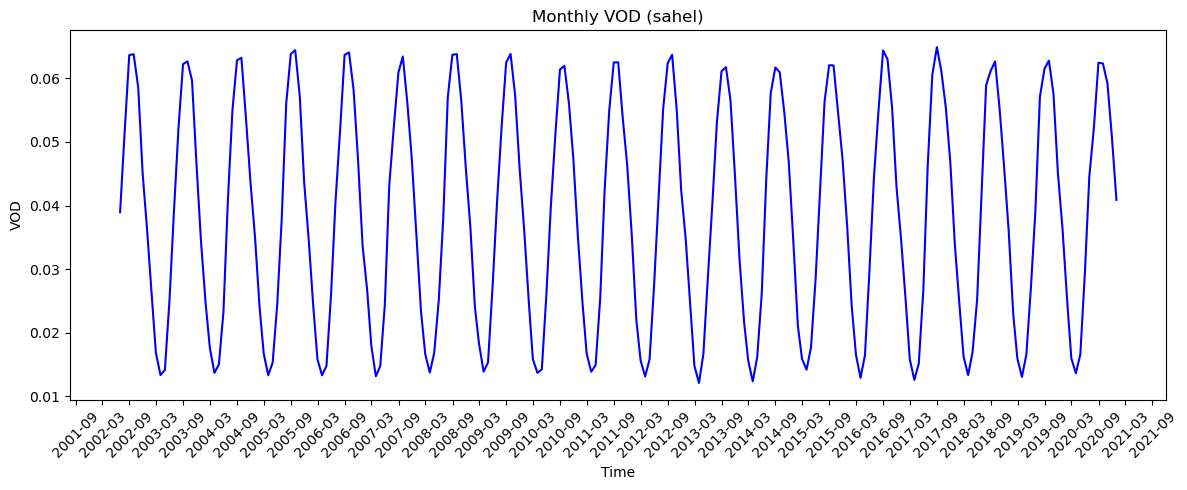

In [10]:
# Sahel
plt.figure(figsize=(12, 5))
vod_sahel_monthly.mean(dim=['lat', 'lon']).plot(label='VOD', color='blue')
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # year-month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  
plt.xticks(rotation=45)
plt.title("Monthly VOD (sahel)")
plt.ylabel("VOD")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

## Hypothesis 1：The strength and pattern of the VOD response to precipitation anomalies differ between these two regions due to differences in ecosystem structure and rainfall seasonality.

### Precipitation Anomaly Time Series Visualization (Regional Averaging)

In [11]:
# Select the Base Period (2002-2011)
precip_au_clim = precip_au_monthly.sel(time=slice("2002-01", "2011-12")).groupby("time.month").mean()
precip_sahel_clim = precip_sahel_monthly.sel(time=slice("2002-01", "2011-12")).groupby("time.month").mean()

In [12]:
# Calculate Anomaly: Subtract the Monthly Average from the Monthly Data
precip_au_anom = precip_au_monthly.groupby("time.month") - precip_au_clim
precip_sahel_anom = precip_sahel_monthly.groupby("time.month") - precip_sahel_clim

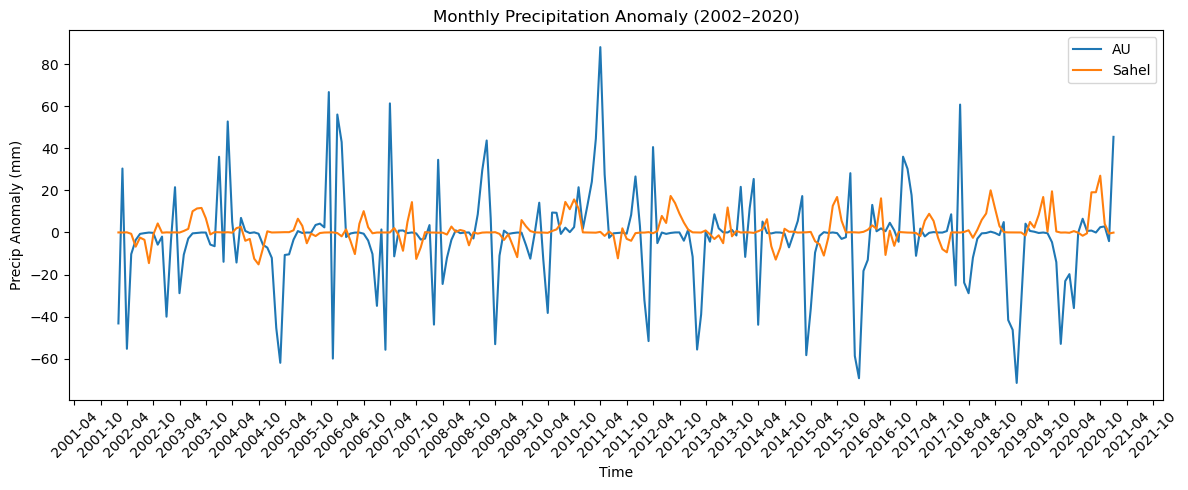

In [13]:
plt.figure(figsize=(12, 5)) 
#  Australia and Sahel: Precip Anomaly
precip_au_anom.mean(dim=['latitude', 'longitude']).plot(label='AU')
precip_sahel_anom.mean(dim=['latitude', 'longitude']).plot(label='Sahel')
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45)
plt.title("Monthly Precipitation Anomaly (2002–2020)")
plt.ylabel("Precip Anomaly (mm)")
plt.xlabel("Time")
plt.legend()
plt.tight_layout()
plt.show()

### Merge VOD Time Series and Average Precipitation Anomaly Time Series

In [14]:
# Regional Average VOD Time Series
vod_au_ts = vod_au_monthly.mean(dim=['lat', 'lon'])
vod_sahel_ts = vod_sahel_monthly.mean(dim=['lat', 'lon'])
# Regional Average Precipitation Anomaly Time Series
precip_au_anom_ts = precip_au_anom.mean(dim=['latitude', 'longitude'])
precip_sahel_anom_ts = precip_sahel_anom.mean(dim=['latitude', 'longitude'])

### North Australia Plotting the Relationship between Precipitation anomaly and VOD
Northern Australia (AU)
VOD (Blue Line – Left Y-axis):

	•	The VOD shows a clear seasonal cycle with one peak and one trough per year.
	•	Peaks in VOD typically occur at the end of the wet season (November to April) or slightly after, indicating that vegetation responds by accumulating biomass following rainfall.
	•	Troughs occur during the dry season (May to October), when limited rainfall restricts vegetation growth.

Precipitation Anomaly (Orange Line – Right Y-axis):

	•	The precipitation anomaly is more erratic, representing deviations from the long-term climatological monthly average.
	•	Positive anomalies reflect wetter-than-average months, while negative anomalies indicate drier-than-average conditions.
	•	Wet-season periods often show strong positive spikes in anomaly, such as in 2010 and 2011, coinciding with major rainfall events.

Relationship Between VOD and Precipitation Anomaly:

	•	VOD appears to lag slightly behind precipitation anomalies — increases in rainfall are often followed by increases in VOD in the next 1–2 months.
	•	This lagged response is biologically reasonable: vegetation takes time to grow in response to improved water availability.
	•	Years like 2009–2012 show strong positive precipitation anomalies followed by peaks in VOD, suggesting a robust relationship between rainfall variability and vegetation dynamics.

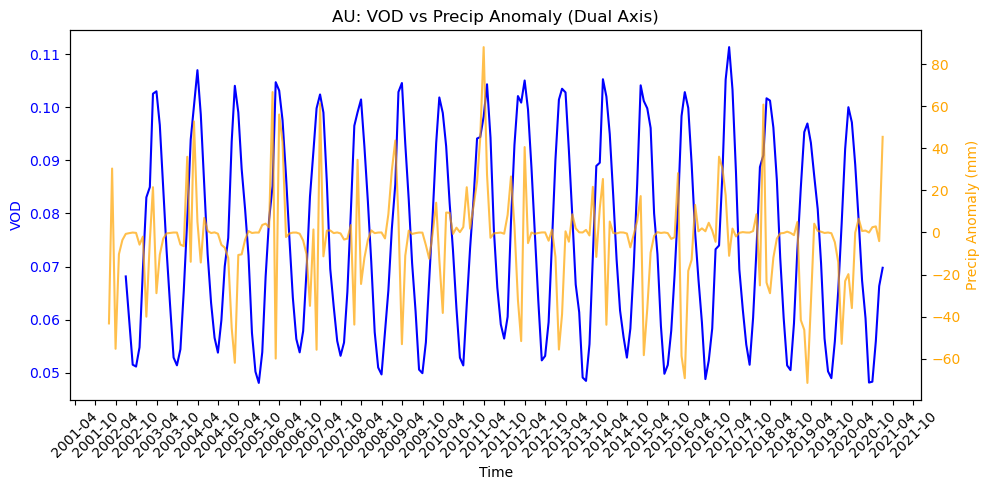

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# VOD 
ax1.plot(vod_au_ts.time, vod_au_ts, 'b-', label="VOD")
ax1.set_xlabel('Time')
ax1.set_ylabel('VOD', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45)

# Precipitation Anomaly
ax2 = ax1.twinx()
ax2.plot(precip_au_anom_ts.time, precip_au_anom_ts, 'orange', alpha=0.7, label="Precip Anomaly")
ax2.set_ylabel('Precip Anomaly (mm)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title("AU: VOD vs Precip Anomaly (Dual Axis)")
plt.tight_layout()
plt.show()

### Sahel Plotting the Relationship between Precipitation anomaly and VOD
The Sahel (Africa):

This dual-axis plot shows the relationship between monthly Vegetation Optical Depth (VOD) and precipitation anomaly in the Sahel region from 2002 to 2020.

	•	Blue line (left y-axis): Regional average VOD, representing vegetation water content and greenness.
	•	Orange line (right y-axis): Precipitation anomaly (in mm), calculated relative to the 2002–2011 monthly climatology.

Interpretation:

	•	VOD exhibits strong seasonal cycles, with peaks generally occurring between July and October, aligning with the wet season in the Sahel (typically May to October, peaking in August).
	•	Precipitation anomalies fluctuate around zero and tend to show positive spikes during the wet season, followed by increases in VOD shortly after—indicating a lagged vegetation response.
	•	This lag suggests that vegetation growth responds to moisture availability with a 1–2 month delay, likely due to soil moisture accumulation and plant physiological processes.
	•	The relationship between rainfall and vegetation is more synchronized in the Sahel than in northern Australia, potentially due to the shorter, more intense rainy season and different vegetation types (e.g., grassland and sparse savanna).

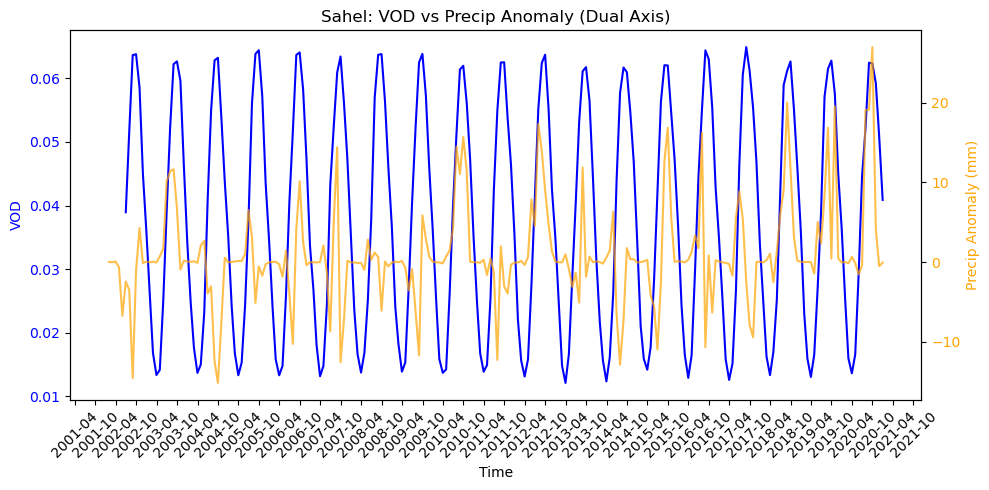

In [16]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Sahel - VOD
ax1.plot(vod_sahel_ts.time, vod_sahel_ts, 'b-', label='VOD')
ax1.set_xlabel('Time')
ax1.set_ylabel('VOD', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Sahel - Precipitation Anomaly 
ax2 = ax1.twinx()
ax2.plot(precip_sahel_anom_ts.time, precip_sahel_anom_ts, color='orange', alpha=0.7, label='Precip Anomaly')
ax2.set_ylabel('Precip Anomaly (mm)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Sahel: VOD vs Precip Anomaly (Dual Axis)')
plt.tight_layout()
plt.show()

## Hypothesis 2: VOD exhibits a lagged response to precipitation anomalies, and the optimal lag period varies between regions.

### Sahel Region Interpretation: 

In the Sahel, the Pearson correlation between precipitation anomalies and vegetation optical depth (VOD) is positive at lag 0 (r = 0.168, p = 0.012), suggesting that vegetation responds rapidly to rainfall, likely at the very beginning of the wet season (June–September). This immediate greening indicates high ecosystem sensitivity to precipitation input, typical for water-limited systems.

However, the correlation becomes significantly negative from lag 4 to lag 6 (e.g., lag 5: r = -0.210, p = 0.002), which implies that around 4–6 months after the wet season, vegetation health deteriorates sharply—likely due to the onset of the dry season (October–May) and rapid soil moisture loss. The strong negative correlations at these lags reflect the vegetation's quick decline once water availability drops.

Interestingly, the correlation becomes positive again at lag 10–12 (significant at all three lags), indicating the ecosystem is preparing for or entering the next rainy season, and VOD begins to rise again in response to increasing moisture availability.

#### Summary:

· Immediate response at lag 0 (wet season onset).

· Rapid degradation by lag 4–6 (dry season impact).

· Cycle renews at lag 10–12, aligning with next rain season.

### Northern Australia Interpretation:

In Northern Australia, the Pearson correlation is significantly negative at lag 0 (r = -0.163, p = 0.015), indicating that vegetation tends to be at a lower VOD state when rainfall anomalies are high—possibly reflecting delayed greening or soil saturation effects.

The correlation increases and becomes significantly positive at lag 5 (r = 0.136, p = 0.045), suggesting that vegetation responds most strongly about 5 months after rainfall, which corresponds well with its wet season (November–April) followed by greening peaking in late wet or early dry season (around April–May).

This lagged response may reflect time needed for plants to fully utilize moisture for biomass accumulation, especially in ecosystems with slower physiological or phenological dynamics.

At lag 12, correlation returns to significantly negative (r = -0.158, p = 0.022), suggesting that the cycle has reset, and VOD is again low as the next wet season begins.

#### Summary:

· Vegetation lags behind precipitation by ~5 months.

· Peak VOD occurs in late wet/early dry season.

· Seasonal cycle resets around lag 12 (~1 year).

In [17]:
# Lagged Correlation Analysis 
def lagged_correlation_with_pval(x, y, max_lag):
    """Calculate Pearson correlation & p-value at different lags (x lags behind y)"""
    corr_vals = []
    p_vals = []
    lags = range(0, max_lag + 1)
    
    for lag in lags:
        x_lag = x.shift(lag)
        valid = x_lag.notnull() & y.notnull()
        if valid.sum() > 2:
            from scipy.stats import pearsonr
            r, p = pearsonr(x_lag[valid], y[valid])
        else:
            r, p = np.nan, np.nan
        corr_vals.append(r)
        p_vals.append(p)
    
    return pd.DataFrame({
        "Lag": lags,
        "Correlation": corr_vals,
        "p-value": p_vals,
        "Significant (p<0.05)": ["Yes" if p < 0.05 else "No" for p in p_vals]
    })

#Convert to pandas Series with datetime index
vod_au_series = vod_au_ts.to_series()
precip_au_series = precip_au_anom_ts.to_series()
vod_sahel_series = vod_sahel_ts.to_series()
precip_sahel_series = precip_sahel_anom_ts.to_series()

In [18]:
au_corr_df = lagged_correlation_with_pval(vod_au_series, precip_au_series, max_lag=12)
sahel_corr_df = lagged_correlation_with_pval(vod_sahel_series, precip_sahel_series, max_lag=12)
import IPython.display as display
display.display(au_corr_df.round(3))
display.display(sahel_corr_df.round(3))

,Lag,Correlation,p-value,Significant (p<0.05)
0,0,-0.163,0.015,Yes
1,1,-0.127,0.058,No
2,2,-0.040,0.557,No
3,3,0.028,0.677,No
4,4,0.096,0.157,No
5,5,0.136,0.045,Yes
6,6,0.124,0.068,No
7,7,0.081,0.238,No
8,8,0.015,0.831,No
9,9,-0.047,0.496,No


,Lag,Correlation,p-value,Significant (p<0.05)
0,0,0.168,0.012,Yes
1,1,0.113,0.093,No
2,2,0.011,0.868,No
3,3,-0.098,0.148,No
4,4,-0.184,0.006,Yes
5,5,-0.210,0.002,Yes
6,6,-0.182,0.007,Yes
7,7,-0.112,0.100,No
8,8,-0.020,0.766,No
9,9,0.081,0.240,No


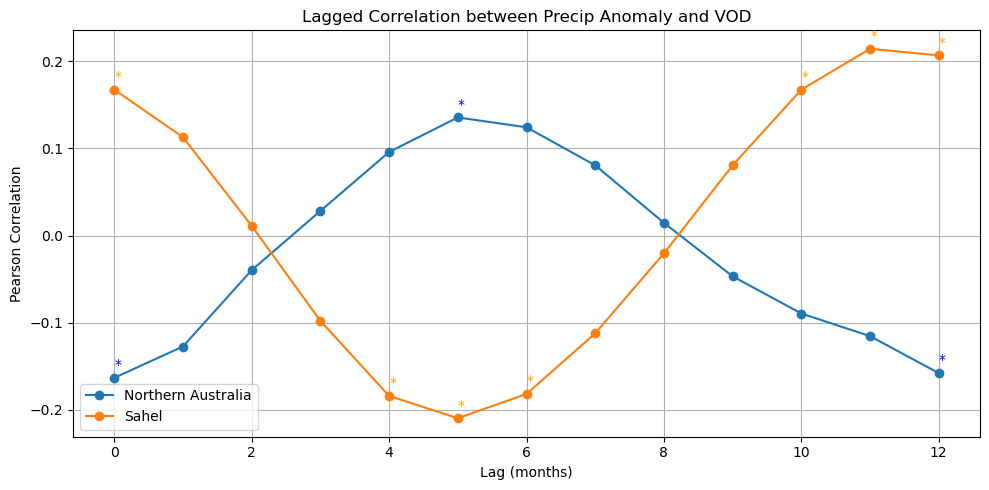

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(au_corr_df['Lag'], au_corr_df['Correlation'], 'o-', label='Northern Australia')
plt.plot(sahel_corr_df['Lag'], sahel_corr_df['Correlation'], 'o-', label='Sahel')

# **
for i, p in enumerate(au_corr_df['p-value']):
    if p < 0.05:
        plt.text(au_corr_df['Lag'][i], au_corr_df['Correlation'][i] + 0.01, '*', color='blue')
for i, p in enumerate(sahel_corr_df['p-value']):
    if p < 0.05:
        plt.text(sahel_corr_df['Lag'][i], sahel_corr_df['Correlation'][i] + 0.01, '*', color='orange')

plt.xlabel("Lag (months)")
plt.ylabel("Pearson Correlation")
plt.title("Lagged Correlation between Precip Anomaly and VOD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()